# 뉴럴 네트워크 (NN) - MNIST

Date: 2019-08-30  
Author: skettee  
Categories: Deep Learning, Neural Network  
Tags: MNIST, ReLU, Adam, Train & Test, Feature, Overfitting, Regularization   
<!--eofm-->


뉴럴 네트워크(NN) 실전 문제! MNIST를 keras를 이용해서 모델링을 해보자!
<!--more-->

실제로 돌려 보고 싶으면 구글 코랩으로 ~  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skettee/notebooks/blob/master/neural_network_mnist.ipynb)

## 문제 (Problem)

👤 상사

> 인공지능을 이용해서 사진을 인식하는 프로젝트를 시작한다    
> 일단 기본 개념을 익히기 위해서  연습 문제를 풀어보게  
>
> 아래 사이트에 가면  'MNIST database of handwritten digits' 데이터 세트에 대한 설명이 있네  
> https://keras.io/datasets/  
> 여기서 제공하는 MNIST 데이터 세트로 훈련해서  
> 손으로 쓴 숫자를 인식하는 프로그램을 만들어 보게  

⚙️ 엔지니어

> 넵~  
> 
> (혼잣말) MNIST? 뭔 말인지 모르것다.. 일단 설명을 보자

0에서 9까지 손으로 쓴 숫자 이미지 데이터 세트를 MNIST dataset이라고 한다.  

이미지(x)는 크기가 가로 28, 세로 28이며 그레이 스케일(0 ~ 255사이의 값)로 되어 있다.  
정답지(y)는 0 ~ 9사이의 정수로 되어 있다.  
훈련을 위한 60,000개의 데이터 세트(x, y)와   
테스트를 위한 10,000개의 데이터 세트(x, y)가 있다.    

⚙️ 엔지니어

> 영상인식을 하면서 가장 처음 실습해 보는것이 MNIST...  
> C에서의 'hello world'급이라고 할 수 있다.  
>
> 지금까지 학습한 모델링 지식을 가지고   
> 숫자를 인식하는 NN 모델을 만들고   
> 훈련과 테스트를 통해서  
> 정확도를 계산하면   
> 되겠군   


## 데이터 수집 (Data Collection)

`keras.datasets`를 이용해서 간단하게 데이터를 가져 올 수 있다.  

⚙️ 엔지니어

> 찬양하라 Keras!  



In [1]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# train_images, test_images: uint8 array of grayscale image data with shape (num_samples, 28, 28)
# train_labels, test_labels: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 데이터 분석 (Data Analysis)

지금까지 본 문제와는 사이즈가 다르다!  
우선 훈련 세트와 테스트 세트에 대해서 알아 보자  

### 훈련 세트와 테스트 세트 (Train and Test set)

우리가 만든 모델을 훈련 시킬때 사용하는 데이터가 **훈련 세트 (Train set)**  
훈련을 마친 모델에 대해서 성능을 확인하기 위해 사용하는 데이터가 **테스트 세트 (Test set)**  

⚙️ 엔지니어

> 훈련 세트는 학교 수업이고  
> 테스트 세트는 모의 고사라고 생각하면 된다.   

### 데이터 확인 (Data Visualization)

설명만 들어서는 어떻게 모델링을 해야 할지 감이 오지 않는다. 데이터를 눈으로 확인해 보자  

**입력(x) 데이터 확인**

In [2]:
# 모양 (shape) 확인
print('train_images shape is ', train_images.shape)

train_images shape is  (60000, 28, 28)


⚙️ 엔지니어

> batch_size 는 60000  
> imput_dimension 은 (28X28)로 2D로 되어 있다.  
>
> 2D라고 쫄지말자...  
> x-y 그래프에서 점을 찍는데 점 색깔이 회색조로 256개가 있다고 생각하면 된다.   
> 0은 검정색, 255는 흰색이다.  
> 그리고 점을 **픽셀(pixel)** 이라고 한다.  
>
> 아래 그림을 보자  



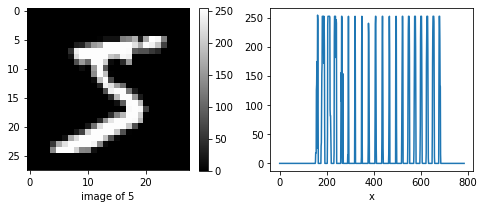

In [3]:
pick_image = 0 # 0 ~ 59999

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
# 이미지(image) 확인
plt.imshow(train_images[pick_image], cmap='gray')
plt.colorbar()
plt.xlabel('image of {}'.format(train_labels[pick_image]))
plt.subplot(1,2,2)
# 픽셀(pixel)값 분포
plt.plot(train_images[0].flatten())
plt.xlabel('x')
plt.show()

같은 숫자는 픽셀값의 분포가 비슷할 것이라고 가정을 하고 입력 x를 784개의 픽셀값으로 한다.  
이렇게 남들과는 다르고 나와 나의 부류와는 비슷한 특징을 **피쳐(feature)** 라고 하고 특징들의 배열을 **피쳐 벡터(feature vector)** 라고 한다.  
  
여기서 피쳐(feature)는 "0~255사이의 픽셀값"이고 피쳐 벡터(feature vector)는 "784개의 픽셀값의 배열"이다.    

**출력(y) 데이터 확인**

- batch_size = 60000   
- input_dimension = 1   

0에서 9까지 10개의 클래스(Class)로 분류하면 된다.    

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

⚙️ 엔지니어

> 이미지의 픽셀값 784(28X28)개를 입력 변수(x)로     
> 숫자값 (0~9) 10개를 출력 변수 (y)로  
>  뉴럴 네트워크(NN)로 모델링을 하면 될것 같다.  


## 데이터 변환 (Data Transformation)

입력 데이터의 2D shape (28,28)를 1D (784, )로 변환해 주는 작업을 **벡터화(Flattern)** 라고 한다.  
이 작업은 keras layer에서 처리해 주면 된다. (나중에 하겠다는 얘기다.)

소프트맥스(Softmax)를 사용할 예정이니까 출력 데이터를 원-핫 인코딩으로 변환해 주자

In [5]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels) # one-hot encoding
Y_test = to_categorical(test_labels)
print('Y_train.shape is ', Y_train.shape)
print('one-hot encoded first Y_train is ', Y_train[0])

Y_train.shape is  (60000, 10)
one-hot encoded first Y_train is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 뉴럴 네트워크 모델링 (NN Modeling)

일단, 3-layer NN 모델로 진행해 보자    
일단이라고 말한 이유는 정답이 없기 때문이다.  

- input layer는 2D(28X28)를 1D로 변환해서 784개의 x로 만든다.  
- hidden layer 1은 128-unit으로 구성하자  
- hiddem layer 2는 84-unit으로 구성하자  
- output layer는 당연히 10-unit으로 구성, softmax를 activation function으로 사용한다.  
- loss는 cross-entropy loss를 사용  

남은것은  
hidden layer의 activation function과 optimizer를 선택하는 것이다.  

⚙️ 엔지니어

> 오늘,  
> 새로운 것들을 소개 하겠다.    
> hidden layer의 activation function의 정석 **ReLU**,   
> optimizer의 끝판왕인 **Adam**  

### ReLU (Rectified Linear Unit)

$a=max(0,z)$



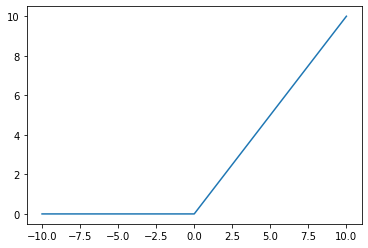

In [6]:
def relu(x):
    return max(0, x)

x_list = [x for x in range(-10, 11)]
y_list = [relu(x) for x in x_list]

plt.plot(x_list, y_list)
plt.show()

시그모이드의 단점은  hidden layer가 많아 질 수록 학습이 안되는 문제가 있다. 미분의 미분의 미분의 ... 미분을 하다 보면 미분값이 0에 가깝게 된다. 그리고 $z$값이 엄청 크거나 작은 값이 되어도 미분값이 0에 가깝게 된다. 이러면 손실 함수의 최소값을 찾기 위해 $w$와 $b$를 움직이지 못한다.  이러한 단점을 보완하기 위해서 탄생한 것이 렐루(ReLU) 함수이다. 물론 엔지니어를 갈아서 만들었다...  

⚙️ 엔지니어

> 수학에 정석이 있듯이 hidden layer에는 ReLU가 있다.  
> 기냥 쓰자  


### Adam (Adaptive moment estimation)

**모멘텀(Momentum)**  

주식 좀 한다는 사람들은 '지수이동평균'에 대해서 잘 알고 있을 것이다.  
상하로 진동하는 주식 그래프를 지수 이동 평균을 계산하면 부드러운 곡선으로 표시되고 상승 혹은 하강 추세를 쉽게 확인 할 수 있다.   
지수이동평균은 현재의 값이 있으면 여기다가 과거에 이동한 방향에 대한 추진력(momentum)을 지수적으로 반영한 것이다.  

경사하강법(Gradient Descent)의 단점은 손실 함수의 최소값을 찾아가는 과정이 주식 그래프 처럼 진동이 심하다는 것이다. 따라서 경사하강법에 '지수이동평균'을 적용해서 **부드럽게** 손실 함수의 최소값을 찾아가는 방법을 모멘텀(Gradient Descent with momentum) 이라고 한다.  

$dw = {\partial {J(w,b)}\over \partial w}$,  
$db = {\partial{J(w,b)}\over \partial b}$  

REPEAT(epoch) {    
$w:=w-\alpha {V_{dw}}$      

$b:=b-\alpha {V_{db}}$   
}  
 
$V_{dw} = \beta_1 V_{dw} + (1-\beta_1 )dw$,  
$V_{db} = \beta_1 V_{db} + (1-\beta_1 )db$  

$\alpha =0.001$ : learining rate,  
$\beta_1 = 0.9$ : exponential decay rate  

**RMSProp**  

급경사인 경우에는 보폭을 낮추어서 가장 아래인지를 세밀히 살피고, 완만한 경사인 경우에는 보폭을 넓혀서 빨리 지나가는 방식이다.  
이 방식은 **빠르게** 손실 함수의 최소값을 찾을 수 있다.  

REPEAT(epoch) {    
$w:=w-\alpha {dw \over {\sqrt {S_{dw}} + \epsilon}}$      

$b:=b-\alpha {db \over {\sqrt {S_{db}} + \epsilon}}$   
}  
 
$S_{dw} = \beta_2 S_{dw} + (1-\beta_2)dw^2$,  
$S_{db} = \beta_2 S_{db} + (1-\beta_2)db^2$  

$\beta_2 = 0.999$ : discounting factor,   
$\epsilon = 1e-07$ : small value to avoid zero denominator  

**Adam**  

앞의 Momentum과 RMSProp을 합친것이 Adam이다.   
**빠르고 부드럽게** 최소값을 찾아 간다.   

REPEAT(epoch) {    
$w:=w-\alpha {V_{dw} \over {\sqrt {S_{dw}} + \epsilon}}$      

$b:=b-\alpha {V_{db} \over {\sqrt {S_{db}} + \epsilon}}$   
}  

⚙️ 엔지니어

> 좋은 것을 모두 합쳐 놓았으니 성능이 좋을 수 밖에   
> 닥치고 Adam 쓰자    

### 정리  

NN을 이용한 MNIST 인식 모델을 만드는 방법을 정리해 보자.  

1. 데이터를 변환한다.    
     1. 입력 데이터의 형식과 모양을 변환한다. 2D를 1D로 변환한다.  
     2. 출력 데이터의 형식과 모양을 변환한다. **원-핫 인코딩(one-hot encoding)** 을 사용한다.  
2. **히든 레이어(hidden layer)**  정의  
     1. 히든 레이어 개수를 정의한다. 여기서는 2-hidden layer를 사용한다.  
     2. 히든 레이어 유닛 개수를 정의한다. 여기서는 128개, 84개 유닛을 사용한다.  
     3. 활성 함수(activation function)를 정의한다. 여기서는 **ReLU** 를 사용한다.  
3. **출력 레이어(output layer)**  정의   
     1. 출력 레이어 유닛 개수를 정의한다. 여기서는 10개의 클래스로 분류해야 되니까 10개의 유닛을 사용한다.  
     2. 활성 함수(activation function)를 정의한다. **소프트맥스(softmax)** 를 사용한다.  
4. 손실 함수 (Loss function)를 정의한다. **크로스-엔트로피 손실(cross-entropy loss)** 를 사용한다.  
5. 옵티마이저(Optimizer)를 정의한다. 여기서는 **Adam** 을 사용한다.  
6. 반복할 회수(epoch)를 결정한다.  
7. 주어진 조건으로 모델을 최적화(fit) 시킨다.  



## 케라스(Keras)로 모델링(Modeling)

**케라스(Keras)** 를 이용해서 구현을 해보자!

### 정규화 (Normalization)

`정규값 = (현재값 - 최소값) / (최대값-최소값)` 으로 정규화 한다!  
최소값이 0이고, 최대값이 255이니까 현재값에서 /255 를 해 주면 된다. 

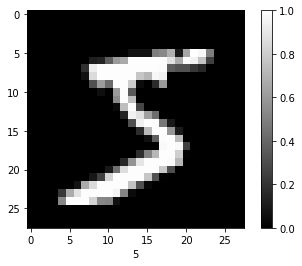

In [7]:
X_train = train_images / 255.0
X_test = test_images / 255.0

plt.imshow(X_train[pick_image], cmap='gray')
plt.colorbar()
plt.xlabel(np.argmax(Y_train[pick_image]))
plt.show()

### 모델링 (Modeling)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0908 14:09:13.760802 139991716501312 deprecation.py:506] From /home/dataman/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 모델 훈련 (Train Model)

In [9]:
hist = model.fit(X_train, Y_train, epochs=10, verbose=0)
train_acc = hist.history['acc'][-1]
train_loss =  hist.history['loss'][-1]

print('train accuracy: ', train_acc)
print('train loss: ', train_loss)

train accuracy:  0.99338335
train loss:  0.020009287602726546


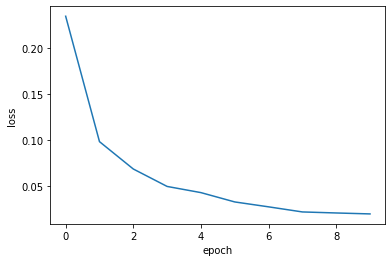

In [10]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 정확도 평가 (Test Model)

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('test accuracy: ', test_acc)
print('test loss: ', test_loss)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1065 - acc: 0.9749
test accuracy:  0.9749
test loss:  0.10645339069099137


대충 만들었는데도 정확도가 상당히 높다.  
그런데...  
훈련 정확도와 테스트 정확도가 차이가 난다.  

⚙️ 엔지니어

> 이것은   
> 디자이너가   
> 피팅모델에 너무 딱 맞게   
> 옷을 만들어서 (over fitting)   
> 실제로 제품이 나왔을때   
> 다른 사람은 입지도 못하는   
> 사태와 비슷하다.  

이것을 훈련 세트에 **과대적합(Overfitting)** 되었다고 한다.  
과대적합(Overfitting)을 줄이는 방법으로는 **규제(Regularization)** 과 **드랍아웃(Dropout)** 이 있다.  
규제(Regularization)에 대해서 알아 보자  

### 규제 (Regularization)

과대적합(Overfitting)을 줄이는 방법 중에 하나로서  
기존의 손실함수 $J(w,b)$에 $ {\lambda \over {2m}} \sum_{l=1}^L ||w||^2$를 추가한 것이다.  

${\large J}(w, b) = -{1\over {m}}\sum_{i=1}^m [(y^{(i)}log({\hat y}^{(i)})) + (1-y^{(i)})log(1-{\hat y}^{(i)})]  
\\
\hspace{3.9em} + {\lambda \over {2m}} \sum_{l=1}^L ||w||^2$

우리는 이것을 **L2 Regularization** 이라고 한다.  
$\lambda$ 값은 모델에 따라서 적절하게 선택해야 한다.  

아래는 기존 모델에 $\lambda = 0.0001$인 L2 Regularization을 적용한 결과이다.  
훈련 정확도는 떨어지고 테스트 정확도는 올라가서 둘 사이의 정확도가 비슷해 진다.  

⚙️ 엔지니어

> Regularization은 $w$의 역활을 줄여 줌으로써,  
> 모델을 약간 **바보**로 만들어 준다.  
> 어느 정도 바보로 만들어 질 것인지는  
> $\lambda$로 정해진다.  



In [12]:
from tensorflow.keras import regularizers

model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(28,28)))
model_l2.add(Dense(128, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_l2.add(Dense(84, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_l2.add(Dense(10, activation='softmax'))
model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model_l2.fit(X_train, Y_train, epochs=10, verbose=0)
train_acc_l2 = hist.history['acc'][-1]
train_loss_l2 =  hist.history['loss'][-1]

print('train accuracy: ', train_acc_l2)
print('train loss: ', train_loss_l2)

train accuracy:  0.98798335
train loss:  0.07904902546405793


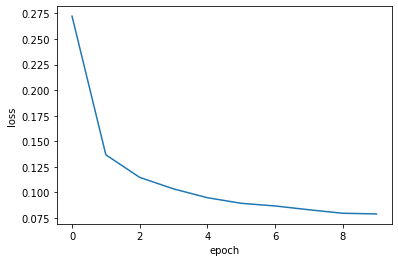

In [13]:
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, Y_test)

print('test accuracy: ', test_acc_l2)
print('test loss: ', test_loss_l2)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.1209 - acc: 0.9776
test accuracy:  0.9776
test loss:  0.12088210636377335


In [15]:
import pandas as pd

df = pd.DataFrame(data=[[train_acc, test_acc], [train_acc_l2, test_acc_l2]], 
                  index = ['model', 'model_with_l2'], 
                  columns=['train accuracy', 'test accuracy'])
df

,train accuracy,test accuracy
model,0.993383,0.9749
model_with_l2,0.987983,0.9776


## 해결 (Solution)

⚙️ 엔지니어  

> 보스~ 원하시는 솔루션입니다.    
> 정확도는 97% 이상입니다.  
>
> test_data에 원하시는 이미지를 입력하시면    
> 원하시는 결과값이 출력 됩니다.   



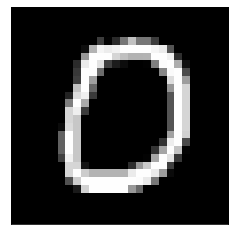

predicted digit is  0


In [16]:
pick_image = 10 # 0 ~ 9999

def predict_handwrittendigits(x):
    x_data =(np.expand_dims(x, 0))
    predict = model_l2.predict(x_data)
    return np.argmax(predict)

test_data = test_images[pick_image]
result = predict_handwrittendigits(test_data)

plt.imshow(test_data, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
print('predicted digit is ', result)